In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
#Parameters


#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

In [37]:
dataimport = pd.read_csv('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/data/Indexes/Sensex.csv')


dataimport['Date'] = pd.to_datetime(dataimport['Date'])
dataimport.set_index('Date', inplace=True)
data = dataimport.resample('M').first()  #Monthly Resampling

data.reset_index(inplace=True)
data['Date'] = data['Date'].astype(str)
stock_names = data.columns[1:]

datacopy = data.copy()

data

,Date,KMB IB Equity,HCLT IB Equity,NTPC IB Equity,NEST IB Equity,BHARTI IB Equity,RELIANCE IB Equity,TCS IB Equity,ITC IB Equity,MM IB Equity,...,HDFCB IB Equity,ICICIBC IB Equity,APNT IB Equity,SBIN IB Equity,TTAN IB Equity,TTMT IB Equity,IIB IB Equity,JSTL IB Equity,LT IB Equity,AXSB IB Equity
0,2011-01-31,227.88,113.63,165.04,3829.15,323.87,475.67,579.78,116.23,393.53,...,239.05,207.93,287.49,282.09,184.12,258.52,264.80,119.17,879.84,273.52
1,2011-02-28,188.13,121.25,154.33,3236.45,283.54,404.15,575.17,106.20,352.53,...,204.01,180.62,248.73,259.58,179.78,211.49,218.35,90.04,702.71,248.36
2,2011-03-31,207.53,116.94,150.67,3558.40,304.49,446.25,562.35,115.67,332.73,...,213.63,186.54,252.23,270.69,169.91,225.66,233.30,94.42,715.96,257.63
3,2011-04-30,225.45,116.76,157.42,3664.35,320.26,467.16,589.83,121.80,355.05,...,233.36,200.49,251.84,271.95,192.83,245.94,265.60,94.96,733.76,281.81
4,2011-05-31,207.50,130.05,151.17,3955.10,346.04,435.31,579.20,127.50,370.48,...,229.07,199.67,274.07,269.16,195.82,243.10,253.95,93.09,713.04,255.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2022-08-31,1854.55,951.75,156.60,19257.90,694.20,2345.98,3299.20,307.55,1236.35,...,1445.15,823.30,3323.75,533.60,2376.65,479.25,1040.85,639.15,1814.20,730.95
140,2022-09-30,1903.85,926.00,160.60,19736.25,735.05,2332.41,3131.55,317.55,1312.40,...,1472.10,874.45,3446.90,533.30,2623.00,466.75,1111.00,661.35,1911.55,744.25
141,2022-10-31,1784.35,930.65,160.40,18992.05,803.45,2163.05,2985.70,324.30,1251.50,...,1412.85,848.05,3301.90,519.65,2575.75,397.65,1156.10,623.70,1819.30,722.95
142,2022-11-30,1908.85,1059.70,181.75,20590.95,835.35,2304.67,3259.60,349.40,1353.80,...,1514.05,908.70,3157.05,576.75,2753.20,421.50,1151.45,686.30,2024.85,871.75


In [38]:
for name in stock_names:
    print(name)

KMB IB Equity
HCLT IB Equity
NTPC IB Equity
NEST IB Equity
BHARTI IB Equity
RELIANCE IB Equity
TCS IB Equity
ITC IB Equity
MM IB Equity
UTCEM IB Equity
TATA IB Equity
SUNP IB Equity
WPRO IB Equity
HUVR IB Equity
INFO IB Equity
MSIL IB Equity
BAF IB Equity
HDFCB IB Equity
ICICIBC IB Equity
APNT IB Equity
SBIN IB Equity
TTAN IB Equity
TTMT IB Equity
IIB IB Equity
JSTL IB Equity
LT IB Equity
AXSB IB Equity


## Strat-1 MACD + RSI

In [39]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [40]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,KMB IB Equity,HCLT IB Equity,NTPC IB Equity,NEST IB Equity,BHARTI IB Equity,RELIANCE IB Equity,TCS IB Equity,ITC IB Equity,MM IB Equity,...,HDFCB IB Equity,ICICIBC IB Equity,APNT IB Equity,SBIN IB Equity,TTAN IB Equity,TTMT IB Equity,IIB IB Equity,JSTL IB Equity,LT IB Equity,AXSB IB Equity
0,2012-03-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-04-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-06-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-07-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2022-08-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
126,2022-09-30,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
127,2022-10-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,2022-11-30,0,0,0,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1


In [41]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [42]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,KMB IB Equity,HCLT IB Equity,NTPC IB Equity,NEST IB Equity,BHARTI IB Equity,RELIANCE IB Equity,TCS IB Equity,ITC IB Equity,MM IB Equity,...,HDFCB IB Equity,ICICIBC IB Equity,APNT IB Equity,SBIN IB Equity,TTAN IB Equity,TTMT IB Equity,IIB IB Equity,JSTL IB Equity,LT IB Equity,AXSB IB Equity
0,2012-03-31,63.245497,56.453512,45.835551,61.765824,44.315608,39.915263,59.845850,64.420491,40.981171,...,58.851501,40.724164,56.410497,44.069759,62.350442,60.197944,61.000034,41.893782,36.196082,46.990950
1,2012-04-30,63.245497,59.474417,40.821010,67.818569,42.957014,35.355798,55.416389,73.133828,45.233819,...,61.027935,41.337431,58.983265,41.487284,65.851756,61.884557,63.660246,38.909004,38.766085,47.191406
2,2012-05-31,66.325906,61.411553,38.457037,67.038268,36.981848,35.853699,60.983489,78.658892,45.495404,...,63.456915,40.680594,64.176675,41.832437,61.500075,68.509055,64.856978,37.339853,35.742171,45.073905
3,2012-06-30,59.013455,56.057931,31.291628,63.087307,35.312965,32.119749,58.048230,69.293161,37.838935,...,51.778623,34.433454,68.423779,38.609346,56.775773,47.977832,55.076579,33.105312,33.320579,39.464994
4,2012-07-31,64.766987,54.697272,42.142498,61.991698,38.171588,38.178811,61.554893,73.929688,47.817664,...,63.519951,44.724440,70.534390,44.889245,57.920864,50.381570,62.284923,39.462191,44.918373,42.949656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2022-08-31,54.416194,49.154254,62.243117,59.741729,59.566805,61.175387,53.927609,70.200963,76.732759,...,53.517047,65.525170,63.438965,64.607647,62.551085,65.170968,52.071606,57.410211,60.542096,53.539011
126,2022-09-30,55.962351,47.671485,63.499223,61.596829,62.971756,60.640794,49.672440,71.823768,78.865704,...,54.948236,68.372512,65.374946,64.560013,66.839128,63.237219,54.602415,58.936586,63.508020,54.539679
127,2022-10-31,51.410381,47.976676,63.385676,57.182129,67.853306,54.266999,46.253160,72.896706,73.087651,...,51.214766,65.371492,61.261653,62.308964,65.294825,53.743716,56.203589,55.315810,58.983508,52.586299
128,2022-11-30,55.473916,55.698814,69.629041,63.272582,69.849654,58.221440,52.821207,76.482873,76.237108,...,56.634524,68.763531,57.377846,67.425614,68.260732,56.188481,55.984342,59.744138,64.971727,62.650277


In [43]:
prices = datacopy
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,KMB IB Equity,HCLT IB Equity,NTPC IB Equity,NEST IB Equity,BHARTI IB Equity,RELIANCE IB Equity,TCS IB Equity,ITC IB Equity,MM IB Equity,...,HDFCB IB Equity,ICICIBC IB Equity,APNT IB Equity,SBIN IB Equity,TTAN IB Equity,TTMT IB Equity,IIB IB Equity,JSTL IB Equity,LT IB Equity,AXSB IB Equity
0,2012-03-31,276.85,120.61,146.88,4395.25,311.84,365.66,610.63,137.80,340.83,...,257.08,160.79,315.27,221.98,228.90,264.81,310.20,77.96,568.00,230.17
1,2012-04-30,276.85,125.03,139.29,4691.85,306.38,334.28,595.67,150.87,354.25,...,263.55,161.97,326.56,212.94,242.70,273.47,325.30,72.30,592.18,231.01
2,2012-05-31,291.52,128.00,135.33,4671.60,279.66,336.26,622.45,163.70,355.08,...,271.10,160.26,352.31,213.79,232.95,313.39,332.30,69.20,545.02,221.32
3,2012-06-30,271.38,122.49,120.79,4569.25,271.23,308.51,612.38,155.87,322.43,...,245.73,142.13,377.71,202.62,221.55,222.12,297.25,60.07,504.22,192.82
4,2012-07-31,299.08,121.03,134.38,4540.75,279.25,332.76,630.10,166.73,356.88,...,286.93,162.54,391.96,217.96,225.30,235.82,338.50,67.92,621.96,205.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2022-08-31,1854.55,951.75,156.60,19257.90,694.20,2345.98,3299.20,307.55,1236.35,...,1445.15,823.30,3323.75,533.60,2376.65,479.25,1040.85,639.15,1814.20,730.95
126,2022-09-30,1903.85,926.00,160.60,19736.25,735.05,2332.41,3131.55,317.55,1312.40,...,1472.10,874.45,3446.90,533.30,2623.00,466.75,1111.00,661.35,1911.55,744.25
127,2022-10-31,1784.35,930.65,160.40,18992.05,803.45,2163.05,2985.70,324.30,1251.50,...,1412.85,848.05,3301.90,519.65,2575.75,397.65,1156.10,623.70,1819.30,722.95
128,2022-11-30,1908.85,1059.70,181.75,20590.95,835.35,2304.67,3259.60,349.40,1353.80,...,1514.05,908.70,3157.05,576.75,2753.20,421.50,1151.45,686.30,2024.85,871.75


In [44]:
def get_returns(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_macd.iloc[i,j]==1):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_macd.iloc[i,j]==-1):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

    

In [45]:
returns,intrade = get_returns(master_macd, master_rsi, prices)

In [46]:
intrade

[[129, 1, 1.3644494997802652, 22]]

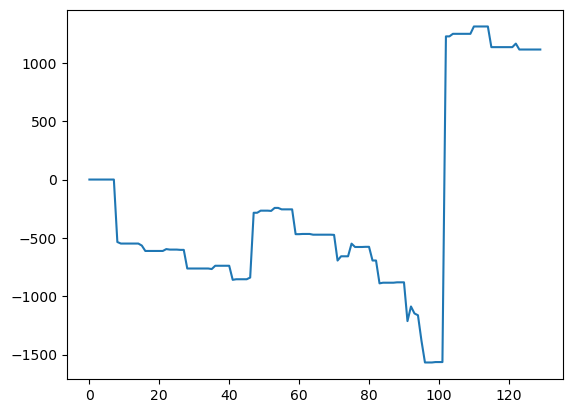

In [47]:
cumulative_returns = np.cumsum(returns)
plt.plot(cumulative_returns)
plt.show()

## Strat-2 RSI

In [48]:
def get_returns1(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_rsi.iloc[i,j]<30):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_rsi.iloc[i,j]>70):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

In [49]:
returns1,intrade1 = get_returns1(master_macd, master_rsi, prices)

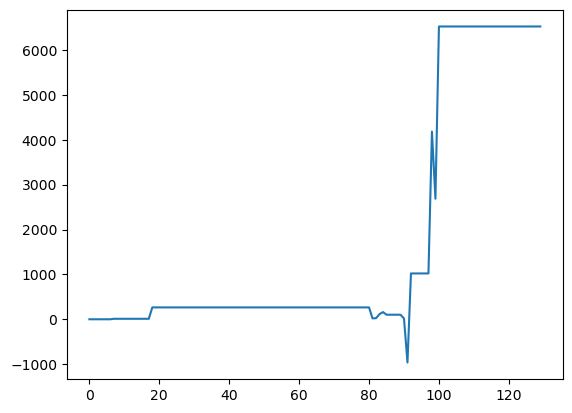

In [50]:
cumulative_returns = np.cumsum(returns1)
plt.plot(cumulative_returns)
plt.show()